Osiel Vivar - ov35 - Machine Learning Project Phase 2 - Dataset 2

Dataset 2 - Company Bankruptcy Prediction

Dataset 2 is [6819x91], meaning there are 90 predictive features. Target variable is categorical, bankruptcy.

Will use logistic regression techniques in order to classify entries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Load Dataset
df = pd.read_csv('bankruptcy.csv')
print(df.shape)
df.head()

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [58]:
#Split data into features and target.
df_y = df['Bankrupt?']
df_x = df.drop(labels = ['Bankrupt?'], axis = 1, inplace = False)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


The dataset is composed of: 

93 Numerical Features: ROA(A,B,C), Realized Sales Gross Margin, Operating Profit Rate

2 Categorical Features:  Liability-Assets Flag,  Net Income Flag.

Our two categorical features are already one hot encoded so no need to adjust data or use get dummies.

In [23]:
#Get Some Basic Plots of the Categorical Variables

(array([   0., 6819.]),
 array([0.5, 1. , 1.5]),
 <BarContainer object of 2 artists>)

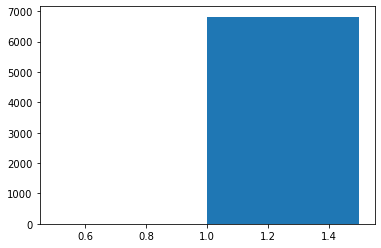

In [26]:
plt.hist(df[' Net Income Flag'], bins = 2)

(array([6811.,    8.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

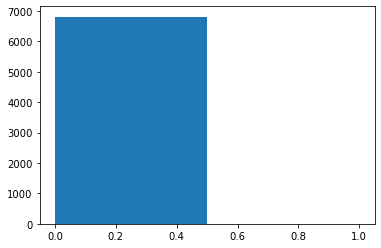

In [27]:
plt.hist(df[' Liability-Assets Flag'], bins = 2)

It seems that the categorical features are almost all the same value. Looking at the distribution in  both plots, there is a negligble number of 0/1's in the features.

In [62]:
#PCA
#To help reduce the number of features we will use PCA.
from sklearn import decomposition
pca = sklearn.decomposition.PCA(n_components = 50)
df_x_pca = pca.fit(df_x).transform(df_x)

df_x_pca.shape

(6819, 50)

After applying PCA to the dataframe, the remaining shape of the dataframe is 6819x50, seeing as how I wanted to get down to Fifty features.

We can now proceed to build, train, and test the model.

In [63]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x_pca, df_y, test_size = 0.25, random_state=1)

The train test split was done with the PCA applied to the features.

LOGISTIC REGRESSION

In [81]:
from sklearn import linear_model
lr_model = linear_model.LogisticRegression() #Loss is L2

lr_model.fit(X_train, y_train)

y_lr =lr_model.predict(X_test)


/Users/lilosivert/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Classification

In [82]:
from sklearn.neighbors import KNeighborsClassifier

#K = sqrt(number of entries)
k = round(6819**(1/2)) #standard for just randomly guessing (not optimizing k value)

neighbors = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train) #Building and training model in same line

y_knn = neighbors.predict(X_test)

We have so far explored the dataset , specifically its categorical values, and we have also reduced the number of features to 50.

Now we will use a confusion matrix in order to see how both models did.

In [85]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

#labels = [0,1]
#fig, ax = plt.subplots()

#plt.xlabels(labels)
#plt.ylabels(labels)

print("Confusion Matrix values for LR Model")
print(confusion_matrix(y_test,y_lr))

print("\n\nConfusion Matrix for KNN Model")
print(confusion_matrix(y_test,y_knn))

Confusion Matrix values for LR Model
[[1631   13]
 [  58    3]]


Confusion Matrix for KNN Model
[[1644    0]
 [  61    0]]


So the confusion matrices are taken using 25% of the data, this is because the test set is only 25%, while training is 75%.

It seems as though the KNN Model performed slightly better, correctly predicting 1644/1705 = 96.4%

While the LR Model performed very closesly, correctly guessing (1631+3)/1705 = 95.8% of the time.

This could likelt be improved by applying Standard_Scalar to standardize data, and also by normalizing the data as well.
